In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [12]:
path = "Flight_on_time_HIX.csv"
df = pd.read_csv("Flight_on_time_HIX.csv")
df.head(2)

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  Departure_Taxi  \
0                    103                       62              15   
1                     25                       15              21   

   Departure_WheelsOff  Scheduled_Arrival_Time  Actual_Arrival_Time  \
0                  118                     127                  219   
1                   46                     616                  624   

   Arrival_Delay_Minutes  Arrival_Taxi  Arrival_WheelsOn  Delay_Reason  
0                     52             7               212  LateAircraft  
1                      8            27               557           NaN

YOUR JOB IS AIRLINE ANALYSIS 

In [13]:
df.columns

Index(['Airline', 'Flight_Number', 'Plane_ID', 'FlightDate', 'Origin_Airport',
       'Destination_Airport', 'Flight_Distance', 'Scheduled_Departure_Time',
       'Actual_Departure_Time', 'Departure_Delay_Minutes', 'Departure_Taxi',
       'Departure_WheelsOff', 'Scheduled_Arrival_Time', 'Actual_Arrival_Time',
       'Arrival_Delay_Minutes', 'Arrival_Taxi', 'Arrival_WheelsOn',
       'Delay_Reason'],
      dtype='object')

In [16]:
airlines

0        TR
1        TR
2        RO
3        XM
4        XM
         ..
65664    NR
65665    YJ
65666    TR
65667    NR
65668    NR
Name: Airline, Length: 65669, dtype: object

In [22]:
# Delay_organized
delay_organized = df["Delay_Reason"].value_counts()
delay_organized

LateAircraft    5780
NAS             4480
Carrier         3320
Weather          492
Security           9
Name: Delay_Reason, dtype: int64

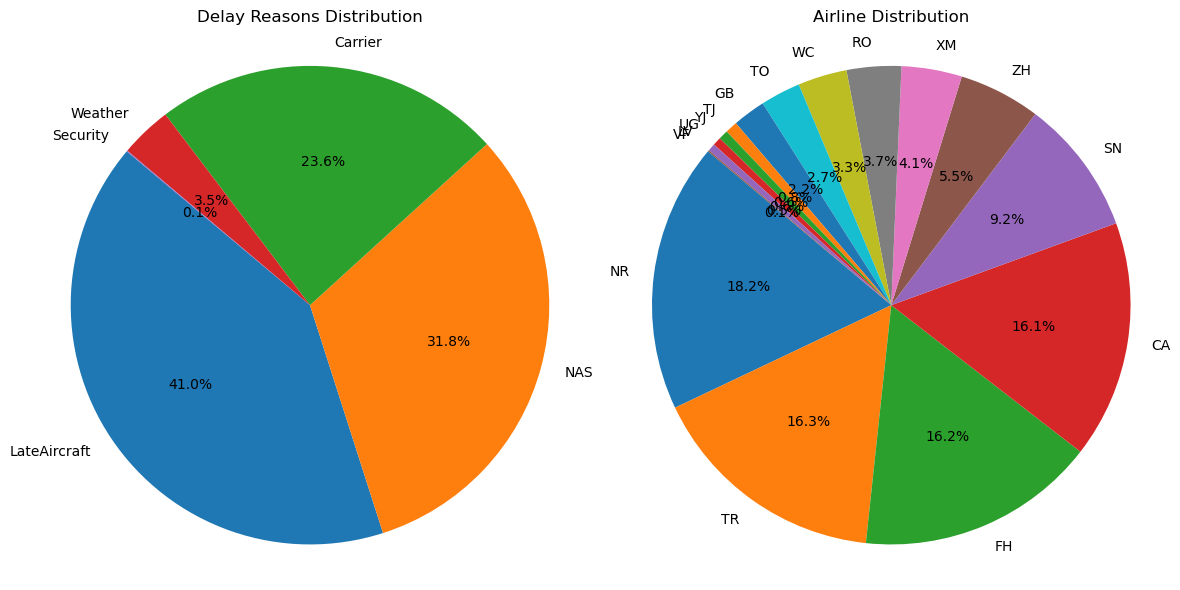

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame df with columns "Delay_Reason" and "Airline"
delay_reasons = df["Delay_Reason"]
airlines = df["Airline"]

# Count the occurrences of each delay reason
delay_reason_counts = delay_reasons.value_counts()

# Count the occurrences of each airline
airline_counts = airlines.value_counts()

# Create a pie chart for delay reasons
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(delay_reason_counts.values, labels=delay_reason_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Delay Reasons Distribution")

# Create a pie chart for airlines
plt.subplot(1, 2, 2)
plt.pie(airline_counts.values, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Airline Distribution")

plt.tight_layout()
plt.show()



In [49]:
airline_reason = df.groupby(["Airline", "Delay_Reason"])
airline_reason.head()

Airline  Flight_Number Plane_ID  FlightDate Origin_Airport  \
0          TR           4135   GJLOAB   12/1/2019            IYF   
3          XM           5604   GBGWFC   12/1/2019            HIX   
4          XM           5612   GBISBC   12/1/2019            HIX   
5          XM           5615   GBJODX   12/1/2019            HIX   
10         NR           3535   GEKWHO   12/1/2019            HIX   
...       ...            ...      ...         ...            ...   
57664      TR           2632   GIFTNK  12/27/2019            HIX   
57894      CA           7118   GJJWFK  12/28/2019            YRL   
58143      GB           1792   GGKPAY  12/28/2019            YCF   
64080      UG           1877   GGHWWP  12/31/2019            HIX   
65207      CA           6707   GBJQFM  12/31/2019            HIX   

      Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                     HIX              678                         1   
3                     IZU              130                        10   
4                     LKF              258                        10   
5                     MPM              475                        10   
10                    LRN             1041                        10   
...                   ...              ...                       ...   
57664                 BRB              925                      2026   
57894                 HIX              557                       551   
58143                 HIX             1182                       740   
64080                 YCF             1182                       645   
65207                 WKQ              235                      1535   

       Actual_Departure_Time  Departure_Delay_Minutes  Departure_Taxi  \
0                        103                       62              15   
3                         44                       34              34   
4                        234                      144              26   
5                        144                       94              11   
10                        55                       45              11   
...                      ...                      ...             ...   
57664                   2046                       20              22   
57894                    607                       16              41   
58143                    754                       14              24   
64080                    727                       42              86   
65207                   1602                       27              43   

       Departure_WheelsOff  Scheduled_Arrival_Time  Actual_Arrival_Time  \
0                      118                     127                  219   
3                      118                     111                  155   
4                      300                     132                  358   
5                      155                     249                  418   
10                     106                     310                  334   
...                    ...                     ...                  ...   
57664                 2108                    2317                 2338   
57894                  648                     815                  831   
58143                  818                     959                 1020   
64080                  853                    1111                 1232   
65207                 1645                    1800                 1846   

       Arrival_Delay_Minutes  Arrival_Taxi  Arrival_WheelsOn  Delay_Reason  
0                         52             7               212  LateAircraft  
3                         44             4               151       Weather  
4                        146             6               352       Carrier  
5                         89             4               414       Carrier  
10                        24             4               330       Carrier  
...                      ...           ...               ...           ...  
57664  

In [59]:
selected_columns = df[["Airline", "Delay_Reason"]]
clean_df = selected_columns.dropna()

In [63]:
# clean_df

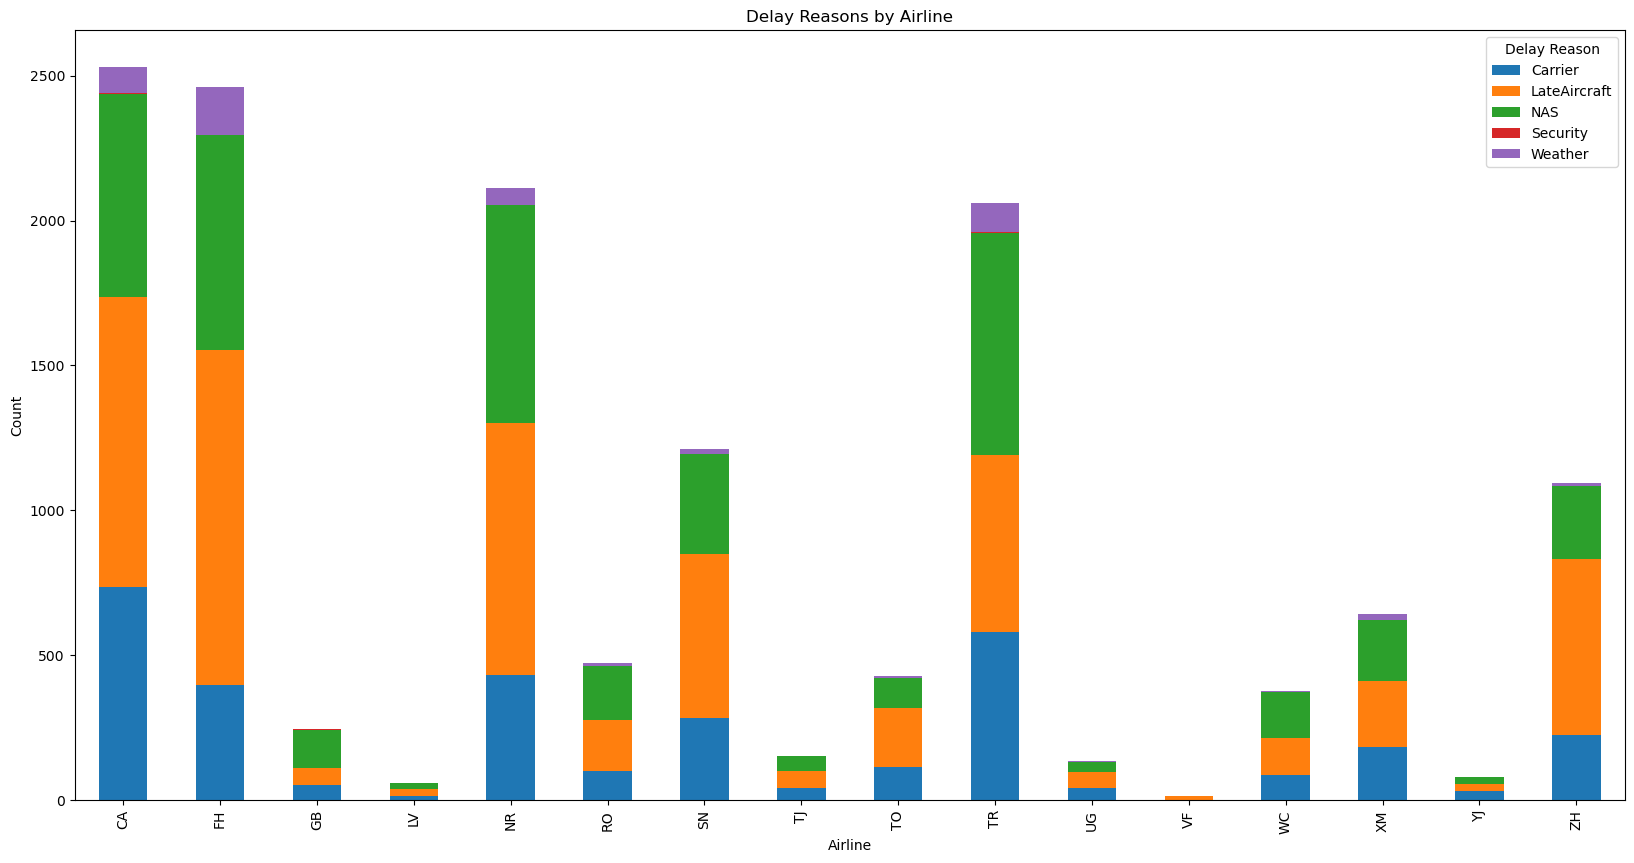

Taking a look at this graph we can observe the main Airlines causing the delays.
However they may just mean that that airline is the majority of the data.


In [69]:
# Group the data by "Airline" and "Delay_Reason" and count the occurrences
grouped = df.groupby(["Airline", "Delay_Reason"]).size().reset_index(name="Count")

# Pivot the data for plotting
pivot = grouped.pivot(index="Airline", columns="Delay_Reason", values="Count").fillna(0)

# plot the multi bar graph
pivot.plot(kind="bar", stacked=True, figsize=(20, 10))

plt.xlabel("Airline")
plt.ylabel("Count")
plt.title("Delay Reasons by Airline")
plt.legend(title="Delay Reason")

plt.show()

print("Taking a look at this graph we can observe the main Airlines causing the delays.")
print("However they may just mean that that airline is the majority of the data.")


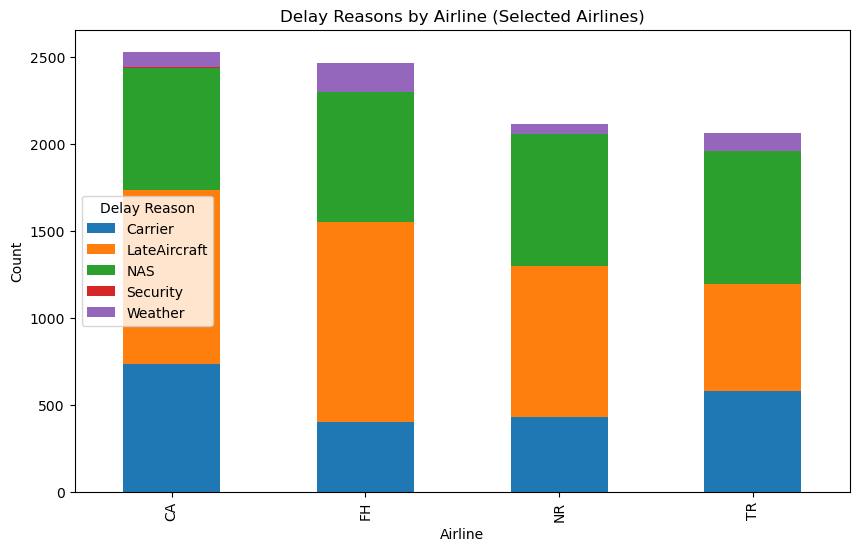

These are the 4 major airlines tracked. TR(16%),FH(16%),NR(18%),TR(16%)
CA, FH seems to have more delays overall compared to TR and NR


In [72]:
# Targeting the main airlines which has a majority of the results. 
selected_airlines = ["FH", "CA","NR","TR"]
filtered_data = grouped[grouped["Airline"].isin(selected_airlines)]

# Pivot the filtered data for plotting
pivot_filtered = filtered_data.pivot(index="Airline", columns="Delay_Reason", values="Count").fillna(0)

# Plot the filtered bar chart
pivot_filtered.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Airline")
plt.ylabel("Count")
plt.title("Delay Reasons by Airline (Selected Airlines)")
plt.legend(title="Delay Reason")

plt.show()
print("These are the 4 major airlines tracked. TR(16%),FH(16%),NR(18%),TR(16%)")
print("CA, FH seems to have more delays overall compared to TR and NR")

In [77]:
# Assuming you have the 'grouped' DataFrame from your previous code
# If not, you can create it as follows:
# grouped = df.groupby(["Airline", "Delay_Reason"]).size().reset_index(name="Count")

# Group the data by "Airline" and sum the "Count" column
total_delays_per_airline = grouped.groupby("Airline")["Count"].sum().reset_index()

# Rename the columns for clarity
total_delays_per_airline.columns = ["Airline", "Total_Delay_Count"]

# Sort the data by the total delay count in descending order
total_delays_per_airline = total_delays_per_airline.sort_values(by="Total_Delay_Count", ascending=False)

# Calculate the percentage column
total_delays_per_airline["Percentage"] = ((total_delays_per_airline["Total_Delay_Count"] / total_delays_per_airline["Total_Delay_Count"].sum()) * 100).round(1)

# Print or display the result
print(total_delays_per_airline)

   Airline  Total_Delay_Count  Percentage
0       CA               2530        18.0
1       FH               2462        17.5
4       NR               2113        15.0
9       TR               2061        14.6
6       SN               1210         8.6
15      ZH               1095         7.8
13      XM                643         4.6
5       RO                474         3.4
8       TO                427         3.0
12      WC                377         2.7
2       GB                246         1.7
7       TJ                152         1.1
10      UG                137         1.0
14      YJ                 79         0.6
3       LV                 59         0.4
11      VF                 16         0.1


In [71]:
df.head(5)

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  Departure_Taxi  \
0                    103                       62              15   
1                     25                       15              21   
2                     10                        0              15   
3                     44                       34              34   
4                    234                      144              26   

   Departure_WheelsOff  Scheduled_Arrival_Time  Actual_Arrival_Time  \
0                  118                     127                  219   
1                   46                     616                  624   
2                   25                     242                  227   
3                  118                     111                  155   
4                  300                     132                  358   

   Arrival_Delay_Minutes  Arrival_Taxi  Arrival_WheelsOn  Delay_Reason  
0                     52             7               212  LateAircraft  
1                      8            27               557           NaN  
2                      0             5               222           NaN  
3                     44             4               151       Weather  
4                    146             6               352       Carrier

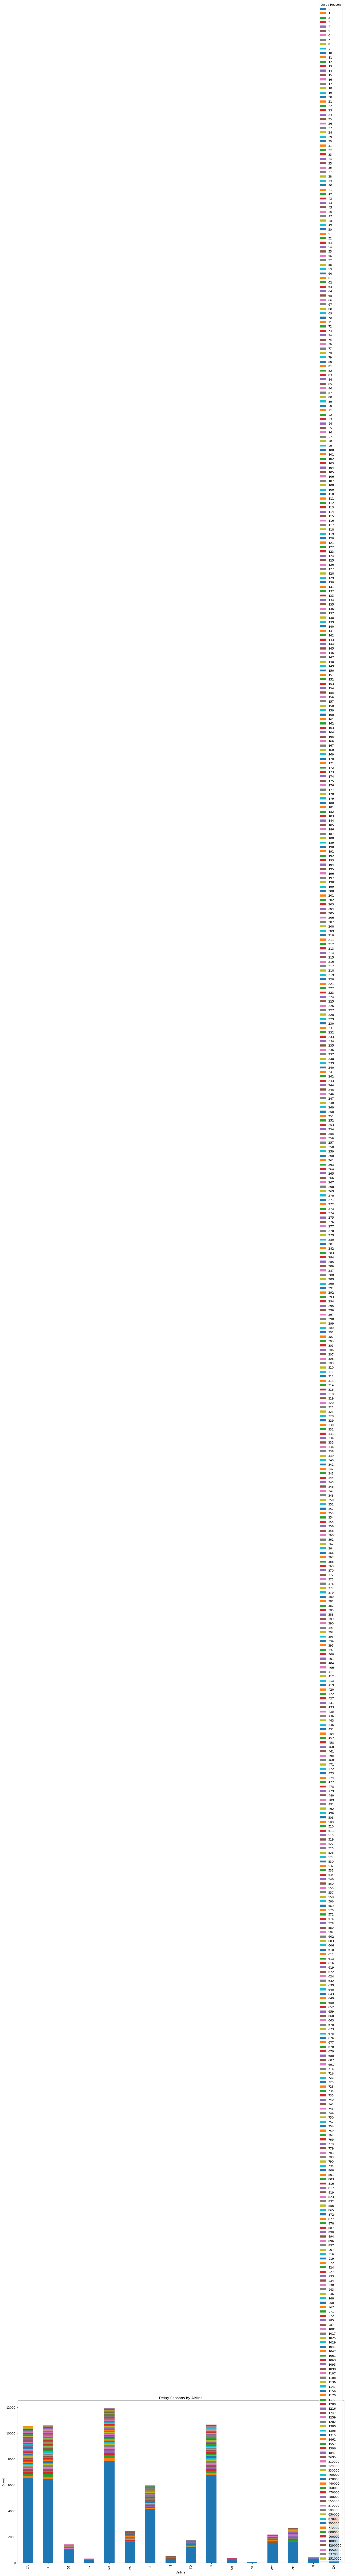

In [64]:
# Group the data by "Airline" and "Delay_Reason" and count the occurrences
grouped = df.groupby(["Airline", "Arrival_Delay_Minutes"]).size().reset_index(name="Count")

# Pivot the data for plotting
pivot = grouped.pivot(index="Airline", columns="Arrival_Delay_Minutes", values="Count").fillna(0)

# plot the multi bar graph
pivot.plot(kind="bar", stacked=True, figsize=(20, 10))

plt.xlabel("Airline")
plt.ylabel("Count")
plt.title("Delay Reasons by Airline")
plt.legend(title="Delay Reason")

plt.show()
